In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [6]:
otus_filename = "/home/earmingo/RotationCodes/data/SoilPyrosequencing/OTUs_table.tsv"
metadata_filename = "/home/earmingo/RotationCodes/data/SoilPyrosequencing/metadata.txt"

In [7]:
OTUs = pd.read_csv(otus_filename, sep='\t', index_col='#OTU ID')

In [8]:
OTUs.head()

,103.CA2,103.CO3,103.SR3,103.IE2,103.BP1,103.VC2,103.SA2,103.GB2,103.CO2,103.KP1,...,103.LQ1,103.HI1,103.RT1,103.HI2,103.DF1,103.CF3,103.AR1,103.TL1,103.HI4,103.BB1
#OTU ID,,,,,,,,,,,,,,,,,,,,,
1124701,15.0,14.0,1.0,8.0,13.0,7.0,6.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244336,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
809489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
OTUs.shape

(7396, 89)

In [10]:
Metadata = pd.read_csv(metadata_filename, sep='\t', index_col='#SampleID')

In [11]:
Metadata['PhClasses'] = Metadata['ph'].apply(lambda x: 1 if (x < 7.0) else 0)

In [12]:
Metadata.head()

,BarcodeSequence,LinkerPrimerSequence,barcode_read_group_tag,experiment_alias,experiment_center,experiment_design_description,experiment_title,instrument_name,key_seq,library_construction_protocol,...,silt_clay,soil_moisture_deficit,soil_type,specific_location,texture,title,tot_org_carb,tot_org_nitro,Description,PhClasses
#SampleID,,,,,,,,,,,,,,,,,,,,,
103.BZ1,ACACATGTCTAC,CATGCTGCCTCCCGTAGGAGT,BZ1_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,80,132.6,gelisol,"Bonanza Creek LTER, AK USA",silt loam,Pyrosequencing-Based Assessment of Soil pH as ...,30.3,0.0,soil metagenome,1
103.CR1,ACCACATACATC,CATGCTGCCTCCCGTAGGAGT,CR1_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,64,160.1,mollisol,"Coffey Ranch, TX USA",loam,Pyrosequencing-Based Assessment of Soil pH as ...,28.3,10.9,soil metagenome,0
103.GB2,ACCTGTCTCTCT,CATGCTGCCTCCCGTAGGAGT,GB2_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,65,-112.3,mollisol,"Great Basin Experimental Range, UT USA",loam,Pyrosequencing-Based Assessment of Soil pH as ...,68.9,0.0,soil metagenome,0
103.GB3,ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GB3_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,76,-112.3,mollisol,"Great Basin Experimental Range, UT USA",clay loam,Pyrosequencing-Based Assessment of Soil pH as ...,57.1,0.0,soil metagenome,0
103.GB1,ACCTCGATCAGA,CATGCTGCCTCCCGTAGGAGT,GB1_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,77,-112.3,mollisol,"Great Basin Experimental Range, UT USA",clay loam,Pyrosequencing-Based Assessment of Soil pH as ...,28.2,0.0,soil metagenome,1


In [13]:
Metadata.shape

(89, 59)

# Data filtering

**Visualize distribution**

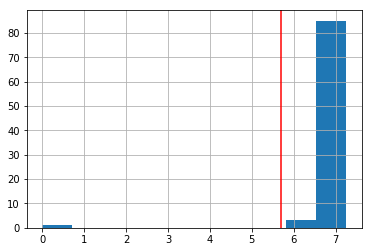

In [14]:
count_filter = 300
OTUs.sum(axis=0).apply(np.log).hist(bins=10)
plt.axvline(x=np.log(count_filter), color='red')

**Filter Samples in both OTUs and Metada tables**

In [15]:
OTUs = OTUs.loc[:, (OTUs.sum(axis=0) >= count_filter)]
OTUs = OTUs.loc[(OTUs.mean(axis=1) >= 2)]

In [16]:
OTUs.shape

(52, 88)

In [17]:
Metadata = Metadata.loc[OTUs.columns, :]

In [18]:
Metadata.shape

(88, 59)

In [19]:
Metadata.index.name = "#SampleID"

In [20]:
Metadata.head()

,BarcodeSequence,LinkerPrimerSequence,barcode_read_group_tag,experiment_alias,experiment_center,experiment_design_description,experiment_title,instrument_name,key_seq,library_construction_protocol,...,silt_clay,soil_moisture_deficit,soil_type,specific_location,texture,title,tot_org_carb,tot_org_nitro,Description,PhClasses
#SampleID,,,,,,,,,,,,,,,,,,,,,
103.CA2,ACACGGTGTCTA,CATGCTGCCTCCCGTAGGAGT,CA2_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,74,198.1,alfisol,"Cedar Mtn. AZ, USA",silt loam,Pyrosequencing-Based Assessment of Soil pH as ...,21.5,0.0,soil metagenome,0
103.CO3,ACATTCAGCGCA,CATGCTGCCTCCCGTAGGAGT,CO3_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,24,230.6,mollisol,"Shortgrass Steppe LTER, CO USA",sandy loam,Pyrosequencing-Based Assessment of Soil pH as ...,8.2,0.0,soil metagenome,1
103.SR3,AGCTCCATACAG,CATGCTGCCTCCCGTAGGAGT,SR3_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,61,323.8,mollisol,"Sedgwick Reserve, CA USA",loam,Pyrosequencing-Based Assessment of Soil pH as ...,33.0,0.0,soil metagenome,1
103.IE2,ACGTCTGTAGCA,CATGCTGCCTCCCGTAGGAGT,IE2_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,49,-609.9,inceptisol,"Institute for Ecosystem Studies, NY USA",sandy loam,Pyrosequencing-Based Assessment of Soil pH as ...,40.7,0.0,soil metagenome,1
103.BP1,ACACACTATGGC,CATGCTGCCTCCCGTAGGAGT,BP1_V2,lauber_88_soils,CCME,bacterial biogeography,Pyrosequencing_based_assessment_of_soil_pH_as_...,Engencore,TCAG,19502440,...,65,79.2,entisol,"Badlands National Park, SD USA",silt loam,Pyrosequencing-Based Assessment of Soil pH as ...,31.0,0.0,soil metagenome,0


# Export data

In [21]:
OTUs.to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/filtered_OTUs_table.tsv", sep='\t')
Metadata.to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/filtered_metadata.txt", sep='\t')

## Split data

In [30]:
subsampling_percentage=0.6
samples = list(Metadata.index)
last_item = int(len(samples) * subsampling_percentage)

In [31]:
random.seed(8)
random.shuffle(samples)
train_samples = samples[:last_item]
test_samples = samples[last_item:]

In [32]:
# Save train
OTUs.loc[:, train_samples].to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/train_filtered_OTUs_table.tsv", sep='\t')
Metadata.loc[train_samples, :].to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/train_filtered_metadata.txt", sep='\t')

# Save test
OTUs.loc[:, test_samples].to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/test_filtered_OTUs_table.tsv", sep='\t')
Metadata.loc[test_samples,:].to_csv("/home/earmingo/RotationCodes/data/SoilPyrosequencing/test_filtered_metadata.txt", sep='\t')


